In [1]:
import os
from Dataset import Dataset
from DataLoader import DataLoader
from Speech import Speech
from preprocessors import *
from utils import scrape_speeches
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd

/home/m_hovo/Desktop/KU Leuven/Modern Data Analytics/mda-project/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



In [2]:
usr_agent = "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36"
cwd = os.getcwd()
path = f"{cwd}/dataset_typical"

In [3]:
if not os.path.exists(path) or len(os.listdir(path)) == 0:
    scrape_speeches("https://www.americanrhetoric.com/", path, usr_agent)

In [4]:
preprocessors = [
    RemoveExtras(names=True),
]
dataset = Dataset(path, preprocessors)
dataloader = DataLoader(dataset)

In [5]:
results_dir = f"{cwd}/results"
emotions_saving_dir = f"{cwd}/results/emotions_typical.csv"
emotions = {
    "anger": [],
    "disgust": [],
    "fear": [],
    "joy": [],
    "neutral": [],
    "sadness": [],
    "surprise": []
}

In [6]:
with tqdm(total=len(dataloader.dataset)) as progress_bar:
    for speech_content in dataloader:
        speech = Speech(speech_content)
        speech_emotions = speech.get_emotion_scores()[0]
        for emotion in speech_emotions:
            emotions[emotion["label"]].append(emotion["score"])
        progress_bar.update(1)

100%|██████████| 77/77 [21:13<00:00, 16.54s/it]


In [9]:
if not os.path.exists(results_dir):
    os.mkdir(results_dir)
emotions_df = pd.DataFrame(emotions)
emotions_df.to_csv(emotions_saving_dir)

# Emotions Scores for each Speech
## Emotions Scores - anger, disgust, fear, joy, neutral, sadness, surprise
### anger < 0.4 - 96% vs typical 96%
### disgust < 0.4 - 98% vs typical 97%
### fear > 0.2 - 49% vs typical 23.3%
### joy > 0.2 - 35% vs typical 41.5%
### neutral > 0.2 - 27% vs typical 41.5%
### sadness > 0.2 - 19% vs sadness 15.5%
### surprise < 0.2 - 80% vs 94.48
### General pattern important: high sadness, fear, joy & low disgust, surprise
### General pattern typical: low disgust, surprise

In [25]:
sum(emotions_df["surprise"] < 0.2) / 77

0.948051948051948

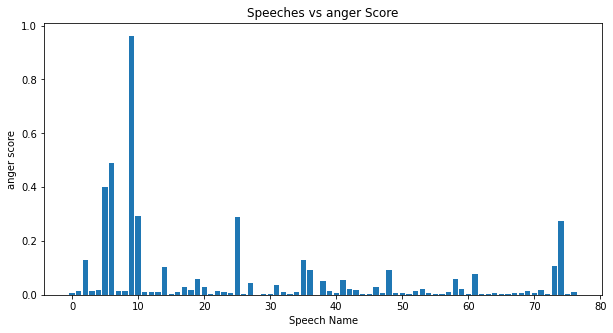

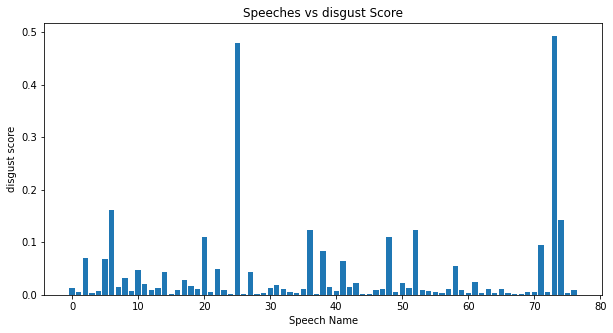

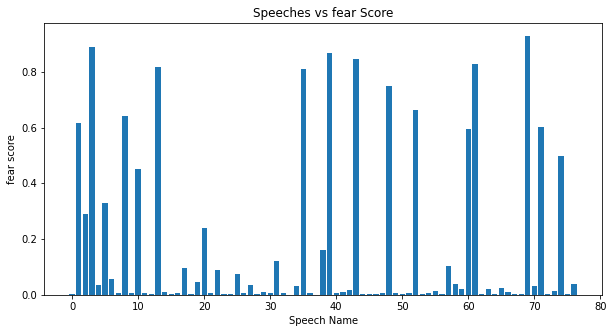

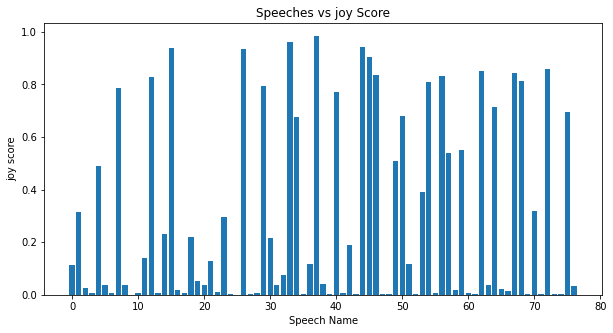

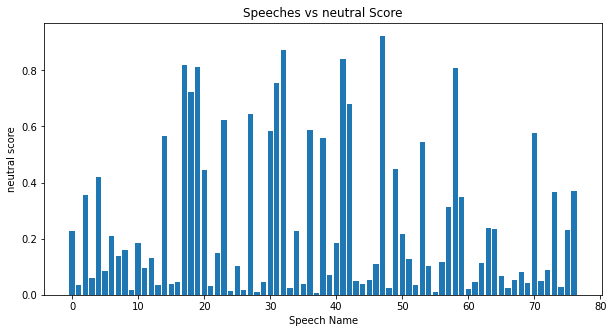

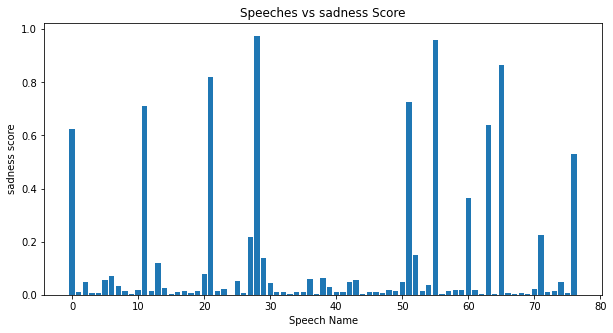

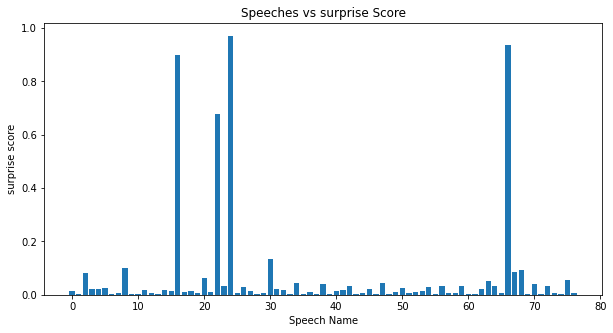

In [11]:
for colname in emotions_df.columns:
    fig = plt.figure(figsize = (10, 5))
    plt.bar(list(range(0, len(emotions_df[colname].array))), emotions_df[colname].array)
    plt.xlabel("Speech Name")
    plt.ylabel(f"{colname} score")
    plt.title(f"Speeches vs {colname} Score")
    plt.show()